In [2]:
# import libraries
import pandas as pd
import numpy as np

# our helper function
from helper import *

In [4]:
# change pandas display options
pd.options.display.max_columns = 100

In [5]:
# read data
data = pd.read_csv('../data/synth_inputs/cheal-a10.csv')

In [6]:
data.head()

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,lat,lon
0,-186.439881,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
1,-186.287886,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
2,-186.134892,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
3,-185.982897,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239
4,-185.830902,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239


In [7]:
# make a copy to the original
data2 = data.copy()

In [8]:
# apply shale cutoff
data2['shale_cutoff'] = data2.GR.map(lambda x: 'sand' if x<=110 else np.nan if np.isnan(x) else 'shale')

In [9]:
data2.head()

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,lat,lon,shale_cutoff
0,-186.439881,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,NaN
1,-186.287886,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,NaN
2,-186.134892,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,NaN
3,-185.982897,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,NaN
4,-185.830902,12.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,NaN


In [10]:
# filter out the nans
data2.dropna(axis=0, how='any', subset=['shale_cutoff'], inplace=True)

In [13]:
# make copy of previous method
data3 = data2.copy()

In [16]:
# filter for sand only
data3 = data3[data3.shale_cutoff=='sand']

In [17]:
data3.head()

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,lat,lon,shale_cutoff
1277,8.168393,12.25,10.906,2.299,NaN,169.423,104.777,0.448,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1278,8.320387,12.25,11.469,2.264,NaN,194.679,108.908,0.374,2.430,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1279,8.472382,12.25,11.607,2.245,NaN,182.024,107.032,0.380,2.667,NaN,NaN,11.921,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1280,8.625377,12.25,11.653,2.226,NaN,141.384,108.087,0.413,2.685,NaN,NaN,12.428,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1281,8.777372,12.25,11.891,2.218,0.001,138.035,100.763,0.423,2.707,NaN,NaN,12.156,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand


In [135]:
import numpy as np
from math import log10

def auto_detect_facies(density, acoustic, PE):
    
    # normalizer
    def normalizer(x, xmin, xmax, scale='cart'):
        # layer for logscale
        if scale == 'log':
            x, xmin, xmax = map(log10, [x, xmin, xmax])
        # normalization
        norm_val = (x - xmin) / (xmax - xmin)
        return norm_val
    
    # petrophysical ranges
    petro_rng = {
        'GR' : (0, 180),
        'density' : (1.95, 2.95),
        'neutron' : (0.15, 0.45),
        'acoustic' : (40, 140),
        'resistivity' : (0.2, 2000),
        'PE' : (0, 10),
    }
    
    # facies dictionary
    # structure in [density, acoustic, PE]
    facies_dict = {
        'SS' : [2.65, 53  , 1.81],
        'LS' : [2.71, 47.5, 5.08],
        #'SH' : [2.5 , 100 , 3   ],
        #'DL' : [2.87, 43  , 3.14],
        #'AN' : [2.98, 50  , 5.06],
        #'SL' : [2.03, 67  , 4.65],
    }
    
    # create coordinate
    density = normalizer(density, *petro_rng['density'])
    acoustic = normalizer(acoustic, *petro_rng['acoustic'])
    PE = normalizer(PE, *petro_rng['PE'])
    coord = np.asarray([density, acoustic, PE])
    
    # calculate distance
    dist = {}
    for key,val in facies_dict.items():
        facies_coord = np.asarray(val)
        facies_coord[0] = normalizer(facies_coord[0], *petro_rng['density'])
        facies_coord[1] = normalizer(facies_coord[1], *petro_rng['acoustic'])
        facies_coord[2] = normalizer(facies_coord[2], *petro_rng['PE'])
        dist[key] = np.linalg.norm(coord - facies_coord)
        
    return min(dist, key=dist.get)

In [134]:
import numpy as np
from math import log10

def auto_detect_facies_nonnormalized(density, acoustic, PE):
    
    # facies dictionary
    # structure in [density, acoustic, PE]
    facies_dict = {
        'SS' : [2.65, 53  , 1.81],
        'LS' : [2.71, 47.5, 5.08],
        #'DL' : [2.87, 43  , 3.14],
        #'AN' : [2.98, 50  , 5.06],
        #'SL' : [2.03, 67  , 4.65],
    }
    
    # create coordinate
    coord = np.asarray([density, acoustic, PE])
    
    # calculate distance
    dist = {}
    for key,val in facies_dict.items():
        facies_coord = np.asarray(val)
        dist[key] = np.linalg.norm(coord - facies_coord)
        
    return min(dist, key=dist.get)

In [97]:
normalizer(2.293, 1.95, 2.95)

0.34300000000000014

In [114]:
#[2.506, 80.861, 4.343]
A2 = [normalizer(2.506, 1.95, 2.95), normalizer(80.861, 40, 140), normalizer(4.343, 0, 10)]
A2

[0.5559999999999997, 0.40861000000000003, 0.4343]

In [115]:
facies_dict2 = {
    'SS' : [normalizer(2.65, 1.95, 2.95)*100, normalizer(53  , 40, 140), normalizer(1.81, 0, 10)],
    'LS' : [normalizer(2.71, 1.95, 2.95)*100, normalizer(47.5, 40, 140), normalizer(5.08, 0, 10)],
    'SH' : [normalizer(2.5 , 1.95, 2.95)*100, normalizer(100 , 40, 140), normalizer(3   , 0, 10)],
    'DL' : [normalizer(2.87, 1.95, 2.95)*100, normalizer(43  , 40, 140), normalizer(3.14, 0, 10)],
    'AN' : [normalizer(2.98, 1.95, 2.95)*100, normalizer(50  , 40, 140), normalizer(5.06, 0, 10)],
    'SL' : [normalizer(2.03, 1.95, 2.95)*100, normalizer(67  , 40, 140), normalizer(4.65, 0, 10)],
}

In [116]:
A2 = np.asarray(A2)

for key,val in facies_dict.items():
    B2 = np.asarray([val])
    print(key, np.linalg.norm(A2-B2))

SS 52.65103691877397
LS 47.368990453904544
SH 99.64339875085604
DL 42.73993344194747
AN 49.865607773515606
SL 66.74097710269233


In [ ]:
np.linalg.norm([])

In [111]:
A = [2.506, 80.861, 4.343]

In [112]:
facies_dict = {
    'SS' : [2.65, 53  , 1.81],
    'LS' : [2.71, 47.5, 5.08],
    'SH' : [2.5 , 100 , 3   ],
    'DL' : [2.87, 43  , 3.14],
    'AN' : [2.98, 50  , 5.06],
    'SL' : [2.03, 67  , 4.65],
}

In [113]:
A = np.asarray(A)

for key,val in facies_dict.items():
    B = np.asarray([val])
    print(key, np.linalg.norm(A-B))

SS 27.976278272851097
LS 33.369763349475534
SH 19.186062806110062
DL 37.881856158324666
AN 30.872966912818736
SL 13.872568111204215


In [131]:
data3

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,lat,lon,shale_cutoff
1277,8.168393,12.25,10.906,2.299,NaN,169.423,104.777,0.448,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1278,8.320387,12.25,11.469,2.264,NaN,194.679,108.908,0.374,2.430,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1279,8.472382,12.25,11.607,2.245,NaN,182.024,107.032,0.380,2.667,NaN,NaN,11.921,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1280,8.625377,12.25,11.653,2.226,NaN,141.384,108.087,0.413,2.685,NaN,NaN,12.428,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1281,8.777372,12.25,11.891,2.218,0.001,138.035,100.763,0.423,2.707,NaN,NaN,12.156,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1282,8.930366,12.25,11.815,2.204,0.001,139.434,98.183,0.434,2.794,NaN,NaN,12.149,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1283,9.082361,12.25,11.746,2.187,0.005,139.499,97.596,0.433,2.802,NaN,NaN,11.999,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1284,9.234356,12.25,11.550,2.125,0.010,138.921,104.986,0.471,2.622,21.640,30.012,12.103,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1285,9.387351,12.25,11.354,2.150,0.018,138.648,105.808,0.448,2.783,23.905,30.335,12.164,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand
1286,9.539345,12.25,11.324,2.191,0.018,135.561,108.505,0.419,3.056,24.052,29.196,12.225,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand


In [138]:
litho = []
for row in data3.index:
    density = data3.loc[row, 'DENS']
    acoustic = data3.loc[row, 'DTC']
    PE = data3.loc[row, 'PEF']
    if np.isnan([density, acoustic, PE]).any():
        litho.append(np.nan)
    else:
        print(auto_detect_facies(density, acoustic, PE), density, acoustic, PE)
        litho.append(auto_detect_facies(density, acoustic, PE))
        #print(auto_detect_facies_nonnormalized(density, acoustic, PE), density, acoustic, PE)
        #litho.append(auto_detect_facies_nonnormalized(density, acoustic, PE))

SS 2.2640000000000002 194.679 2.43
SS 2.245 182.024 2.667
SS 2.226 141.384 2.685
SS 2.218 138.035 2.707
SS 2.204 139.434 2.7939999999999996
SS 2.187 139.499 2.802
SS 2.125 138.921 2.622
SS 2.15 138.648 2.783
SS 2.191 135.561 3.056
SS 2.221 127.531 2.73
SS 2.238 128.244 2.948
SS 2.193 130.727 2.803
SS 2.197 137.954 2.7739999999999996
SS 2.191 137.87 2.863
SS 2.178 137.786 2.73
SS 2.1719999999999997 138.268 2.801
SS 2.2030000000000003 138.39600000000002 2.826
SS 2.222 138.45 3.03
SS 2.184 138.78 2.835
SS 2.1590000000000003 137.321 2.8560000000000003
SS 2.1959999999999997 136.874 2.9019999999999997
SS 2.237 136.36700000000002 2.917
SS 2.228 135.116 2.8289999999999997
SS 2.246 135.344 2.986
SS 2.23 134.685 2.963
SS 2.215 136.713 2.89
SS 2.222 136.451 2.925
SS 2.191 139.858 2.908
SS 2.219 136.46200000000002 2.804
SS 2.218 136.833 2.7539999999999996
SS 2.199 137.35399999999998 2.928
SS 2.201 137.838 2.891
SS 2.1919999999999997 137.54399999999998 2.822
SS 2.219 137.939 2.826
SS 2.213 137.9479

SS 2.188 129.502 2.715
SS 2.211 129.043 2.7510000000000003
SS 2.204 129.74200000000002 2.775
SS 2.222 129.709 2.8089999999999997
SS 2.208 130.135 2.884
SS 2.188 129.808 2.8539999999999996
SS 2.198 130.561 2.695
SS 2.193 129.42700000000002 3.014
SS 2.2 128.714 2.8310000000000004
SS 2.178 128.553 2.68
SS 2.195 128.481 2.805
SS 2.1959999999999997 128.768 2.733
SS 2.201 128.483 2.795
SS 2.214 128.116 2.659
SS 2.22 129.549 2.7
SS 2.22 129.97799999999998 2.693
SS 2.175 130.38 2.511
SS 2.142 130.584 2.512
SS 2.157 129.424 2.502
SS 2.2030000000000003 128.29 2.614
SS 2.237 128.079 2.833
SS 2.225 127.671 2.815
SS 2.188 128.037 2.699
SS 2.18 128.852 2.642
SS 2.188 128.769 2.605
SS 2.202 129.217 2.678
SS 2.162 129.391 2.603
SS 2.13 128.607 2.524
SS 2.128 127.71700000000001 2.555
SS 2.173 126.91 2.399
SS 2.166 126.079 2.418
SS 2.15 126.23299999999999 2.43
SS 2.129 127.061 2.456
SS 2.138 127.29799999999999 2.515
SS 2.165 126.751 2.506
SS 2.21 126.37200000000001 2.428
SS 2.208 117.40799999999999 2.40

SS 2.273 120.72399999999999 2.83
SS 2.286 119.76700000000001 2.8480000000000003
SS 2.276 120.087 2.9
SS 2.249 119.931 2.801
SS 2.168 122.00299999999999 2.7539999999999996
SS 2.16 123.352 2.6210000000000004
SS 2.158 121.46700000000001 2.506
SS 2.263 107.51899999999999 2.6510000000000002
SS 2.2640000000000002 121.787 2.84
SS 2.224 122.89200000000001 2.7769999999999997
SS 2.2159999999999997 122.955 2.6660000000000004
SS 2.235 122.09299999999999 2.6910000000000003
SS 2.245 125.10799999999999 2.86
SS 2.227 123.928 2.658
SS 2.222 124.427 2.745
SS 2.136 124.23899999999999 2.738
SS 2.151 125.14399999999999 2.543
SS 2.161 125.24700000000001 2.612
SS 2.162 124.96600000000001 2.628
SS 2.156 124.72 2.595
SS 2.1630000000000003 124.18299999999999 2.688
SS 2.2569999999999997 122.96799999999999 2.923
SS 2.149 122.395 2.786
SS 2.244 123.73899999999999 2.7569999999999997
SS 2.272 121.681 2.8569999999999998
SS 2.217 115.274 2.7969999999999997
SS 2.224 113.91799999999999 2.8760000000000003
SS 2.219 113.21

SS 2.536 79.22800000000002 3.6889999999999996
SS 2.559 81.34100000000002 3.5669999999999997
SS 2.497 89.809 3.3480000000000003
SS 2.332 98.054 3.0669999999999997
SS 2.287 107.398 2.838
SS 2.272 112.178 2.9410000000000003
SS 2.324 112.598 2.792
SS 2.306 112.147 2.767
SS 2.293 111.949 2.9130000000000003
SS 2.3209999999999997 112.90299999999999 2.8680000000000003
SS 2.305 113.103 2.8369999999999997
SS 2.322 112.439 2.8080000000000003
SS 2.31 115.71799999999999 2.844
SS 2.303 114.396 2.792
SS 2.287 113.99700000000001 2.8739999999999997
SS 2.293 112.934 2.9160000000000004
SS 2.3280000000000003 110.60799999999999 2.872
SS 2.356 109.55799999999999 2.838
SS 2.372 109.272 2.786
SS 2.331 109.214 2.7239999999999998
SS 2.305 111.213 2.878
SS 2.323 112.104 2.81
SS 2.318 111.316 2.7710000000000004
SS 2.314 114.464 2.845
SS 2.298 113.34700000000001 2.8280000000000003
SS 2.3409999999999997 113.426 2.8289999999999997
SS 2.3040000000000003 112.149 2.907
SS 2.292 113.49600000000001 2.892
SS 2.28400000000

SS 2.278 108.071 2.69
SS 2.245 109.0 2.923
SS 2.259 108.39299999999999 2.7489999999999997
SS 2.34 97.51899999999999 3.0580000000000003
SS 2.468 96.65 3.234
SS 2.352 97.678 3.241
SS 2.278 102.04700000000001 3.015
SS 2.47 92.088 2.9789999999999996
SS 2.577 88.573 3.772
SS 2.431 86.61200000000002 3.157
SS 2.391 93.529 2.912
SS 2.356 99.911 2.71
SS 2.338 101.626 2.708
SS 2.347 104.73700000000001 2.9819999999999998
SS 2.369 103.78 2.86
SS 2.339 101.322 2.8680000000000003
SS 2.333 101.402 2.951
SS 2.351 102.99 2.608
SS 2.363 102.264 2.658
SS 2.355 104.273 2.71
SS 2.336 104.412 2.7880000000000003
SS 2.33 104.20100000000001 2.73
SS 2.322 104.745 2.764
SS 2.3080000000000003 109.07700000000001 2.931
SS 2.303 106.6 2.6489999999999996
SS 2.294 105.37700000000001 2.5380000000000003
SS 2.323 104.155 2.608
SS 2.33 101.579 2.6
SS 2.338 102.448 2.609
SS 2.331 103.537 2.734
SS 2.332 103.022 2.657
SS 2.331 103.48100000000001 2.568
SS 2.3 103.206 2.59
SS 2.295 102.634 2.72
SS 2.302 102.125 2.733
SS 2.312 

SS 2.273 108.432 2.752
SS 2.282 107.90700000000001 2.807
SS 2.3209999999999997 100.271 2.7460000000000004
SS 2.4330000000000003 101.59299999999999 2.7969999999999997
SS 2.343 100.045 2.85
SS 2.3080000000000003 100.76299999999999 2.762
SS 2.307 104.29 2.627
SS 2.309 105.06700000000001 2.81
SS 2.319 104.759 2.8560000000000003
SS 2.3080000000000003 104.58200000000001 2.7680000000000002
SS 2.3209999999999997 104.734 2.7889999999999997
SS 2.2969999999999997 105.65799999999999 2.838
SS 2.273 106.13799999999999 2.7939999999999996
SS 2.285 106.63600000000001 2.75
SS 2.3080000000000003 104.62100000000001 2.7319999999999998
SS 2.289 104.837 2.784
SS 2.299 104.542 2.755
SS 2.314 104.85600000000001 2.725
SS 2.332 105.416 2.8369999999999997
SS 2.325 105.18 2.763
SS 2.31 104.198 2.742
SS 2.311 103.825 2.855
SS 2.311 104.26799999999999 2.8930000000000002
SS 2.373 100.60600000000001 2.7769999999999997
SS 2.355 101.29 2.767
SS 2.313 102.60600000000001 2.76
SS 2.273 104.333 2.7119999999999997
SS 2.31699

SS 2.372 96.89399999999999 2.852
SS 2.388 96.449 2.8569999999999998
SS 2.3819999999999997 96.132 2.877
SS 2.355 96.25 2.92
SS 2.381 97.204 2.823
SS 2.362 96.654 2.773
SS 2.354 97.165 2.755
SS 2.3369999999999997 97.553 2.78
SS 2.3169999999999997 97.81700000000001 2.878
SS 2.331 98.84 2.8539999999999996
SS 2.35 98.84200000000001 2.915
SS 2.367 98.329 2.9139999999999997
SS 2.372 98.541 2.8760000000000003
SS 2.385 98.97399999999999 2.887
SS 2.367 99.41799999999999 2.8739999999999997
SS 2.315 102.314 2.782
SS 2.279 102.921 2.77
SS 2.267 104.54799999999999 2.589
SS 2.252 105.09700000000001 2.448
SS 2.25 104.12 2.655
SS 2.204 102.516 2.71
SS 2.18 101.367 2.61
SS 2.286 100.523 2.593
SS 2.3080000000000003 99.723 2.608
SS 2.3280000000000003 100.256 2.616
SS 2.3080000000000003 100.49700000000001 2.5540000000000003
SS 2.2680000000000002 100.04799999999999 2.625
SS 2.29 101.075 2.7689999999999997
SS 2.281 102.55 2.522
SS 2.2569999999999997 107.336 2.49
SS 2.251 105.948 2.491
SS 2.2359999999999998 1

SS 2.366 96.667 2.847
SS 2.331 97.791 3.014
SS 2.367 91.766 2.984
SS 2.481 82.666 3.12
SS 2.591 84.805 3.395
SS 2.397 96.76799999999999 3.185
SS 2.366 96.61399999999999 3.0860000000000003
SS 2.376 91.935 3.032
SS 2.346 91.214 2.873
SS 2.32 89.537 2.875
SS 2.343 88.833 3.18
SS 2.376 89.92 3.051
SS 2.437 92.82700000000001 3.077
SS 2.387 100.088 3.1439999999999997
SS 2.392 99.44200000000001 3.1189999999999998
SS 2.367 98.02 3.009
SS 2.362 98.28 3.005
SS 2.378 98.988 2.928
SS 2.388 98.26700000000001 2.8569999999999998
SS 2.362 98.63 3.0189999999999997
SS 2.352 99.166 3.18
SS 2.376 99.546 3.076
SS 2.383 99.711 3.17
SS 2.299 100.404 2.9819999999999998
SS 2.358 100.87299999999999 3.093
SS 2.378 100.539 3.1710000000000003
SS 2.37 100.31299999999999 3.088
SS 2.396 100.351 3.042
SS 2.354 100.52 3.117
SS 2.367 100.68700000000001 3.0389999999999997
SS 2.373 100.25 3.013
SS 2.4019999999999997 98.625 3.13
SS 2.362 97.331 3.005
SS 2.426 96.931 3.1060000000000003
SS 2.42 98.206 2.9810000000000003
SS 2

SS 2.44 87.84200000000001 3.1910000000000003
SS 2.4290000000000003 91.86 3.1039999999999996
SS 2.412 81.544 2.969
SS 2.5610000000000004 78.196 3.265
SS 2.4659999999999997 79.45100000000002 3.3110000000000004
SS 2.4619999999999997 89.76799999999999 3.185
SS 2.4090000000000003 93.258 3.11
SS 2.401 94.14 2.9819999999999998
SS 2.3890000000000002 93.3 2.937
SS 2.41 93.314 2.947
SS 2.431 93.80799999999999 3.0
SS 2.443 100.09200000000001 3.0260000000000002
SS 2.447 94.581 3.0180000000000002
SS 2.388 94.199 3.013
SS 2.386 94.39299999999999 3.0839999999999996
SS 2.417 94.241 3.208
SS 2.438 94.39299999999999 3.133
SS 2.463 94.398 3.272
SS 2.432 95.435 3.1
SS 2.4090000000000003 95.83200000000001 3.065
SS 2.425 95.421 3.1189999999999998
SS 2.421 94.962 2.985
SS 2.386 94.066 2.904
SS 2.398 93.736 3.073
SS 2.411 94.37100000000001 3.157
SS 2.443 94.554 3.133
SS 2.411 94.684 3.142
SS 2.4019999999999997 94.64200000000001 3.02
SS 2.642 81.782 3.898
SS 2.47 79.112 3.262
SS 2.634 82.17299999999999 3.48100

In [139]:
pd.Series(litho).groupby(litho).count()

LS      11
SS    3240
dtype: int64

In [141]:
data3['litho'] = litho

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [142]:
data3.head()

,tvdss,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,fm,well,DTS,GR_CORR,NEUT_CORR,RESD_CORR,RESS_CORR,TEMP,TENS,lat,lon,shale_cutoff,litho
1277,8.168393,12.25,10.906,2.299,NaN,169.423,104.777,0.448,NaN,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand,NaN
1278,8.320387,12.25,11.469,2.264,NaN,194.679,108.908,0.374,2.430,NaN,NaN,NaN,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand,SS
1279,8.472382,12.25,11.607,2.245,NaN,182.024,107.032,0.380,2.667,NaN,NaN,11.921,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand,SS
1280,8.625377,12.25,11.653,2.226,NaN,141.384,108.087,0.413,2.685,NaN,NaN,12.428,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand,SS
1281,8.777372,12.25,11.891,2.218,0.001,138.035,100.763,0.423,2.707,NaN,NaN,12.156,NaN,NaN,cheal-a10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39.387038,174.304239,sand,SS


In [147]:
pd.options.display.max_rows = 10000

In [149]:
lol = data4[['tvdss','litho']]
lol[lol['litho']=='LS']

,tvdss,litho
1699,72.470000,LS
1700,72.623000,LS
1701,72.775000,LS
1702,72.928000,LS
1703,73.080000,LS
1704,73.232000,LS
1705,73.385000,LS
2153,141.508000,LS
8733,1124.543730,LS
8914,1149.698156,LS


In [144]:
data4 = data3.dropna(axis=0, how='any', subset=['litho'])

TypeError: 'AxesSubplot' object does not support indexing

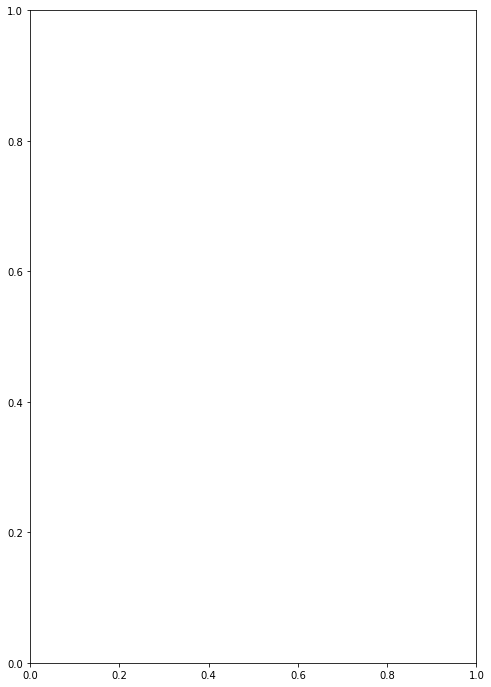

In [145]:
plotter(data4, depth_col=[0], cat_col=[-1], cat_classes=[data3.litho.unique().tolist()])